## Food Delivery Time Prediction

### Import Needed libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/train.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
df.replace({"NaN":np.nan},regex = True, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [6]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [7]:
df.isnull().sum() #checking null values in dataset

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

### EDA

In [8]:
df.drop('ID', axis=1, inplace=True)

In [9]:
obj = df.select_dtypes(include=['object'])
for i in obj.columns:
    print(df[i].value_counts())

PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: Delivery_person_ID, Length: 1320, dtype: int64
35    2262
36    2260
37    2227
30    2226
38    2219
24    2210
32    2202
22    2196
29    2191
33    2187
28    2179
25    2174
34    2166
26    2159
21    2153
27    2150
39    2144
20    2136
31    2120
23    2087
50      53
15      38
Name: Delivery_person_Age, dtype: int64
4.8    7148
4.7    7142
4.9    7041
4.6    6940
5      3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4      1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6        53
1        38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3         6
Name: Delivery_person_Ratings, dtype: int64
15-03-2022    1192
03-04-2022    1178
13-03

#### Delivery Person ID

In [10]:
df['Delivery_person_ID'].head()

0     INDORES13DEL02 
1     BANGRES18DEL02 
2     BANGRES19DEL01 
3    COIMBRES13DEL02 
4     CHENRES12DEL01 
Name: Delivery_person_ID, dtype: object

In [11]:
df['Dest_city'] = df['Delivery_person_ID'].str.split("RES",expand=True)[0]

In [12]:
df['Dest_city'].nunique() #We have 22 different cities

22

In [13]:
df['Dest_city'].value_counts()

JAP       3443
RANCHI    3229
BANG      3195
SUR       3187
HYD       3181
MUM       3173
MYS       3171
COIMB     3170
VAD       3166
INDO      3159
CHEN      3145
PUNE      3132
AGR        763
LUDH       758
ALH        740
KNP        740
DEH        737
GOA        709
AURG       703
KOC        701
KOL        700
BHP        691
Name: Dest_city, dtype: int64

In [14]:
df.drop(['Delivery_person_ID'],axis=1,inplace=True)

#### Delivery Person Age

In [15]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float')

<Axes: xlabel='Delivery_person_Age', ylabel='Density'>

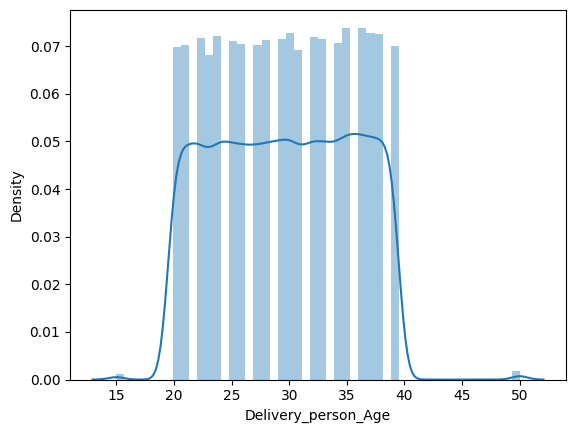

In [16]:
sns.distplot(df['Delivery_person_Age'])

In [17]:
df[df['Delivery_person_Age']<18].shape[0] # Total 38 Minor Delivery Person

38

#### Delivery Person Ratings

In [18]:
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')

<Axes: xlabel='Delivery_person_Ratings', ylabel='Density'>

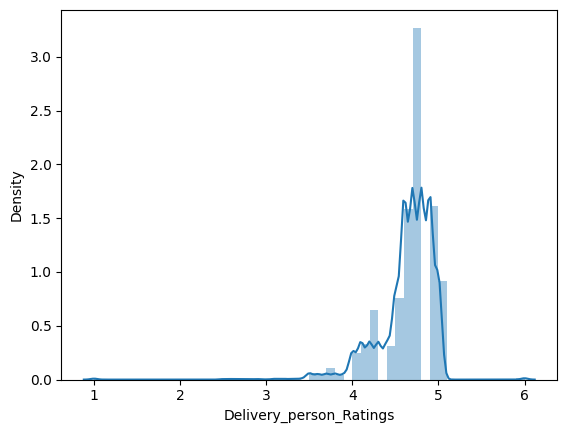

In [19]:
sns.distplot(df['Delivery_person_Ratings'])

#### Order Date

In [20]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Day'] = df['Order_Date'].dt.day
df.drop('Order_Date',axis=1,inplace=True)

#### Time Orderd

In [21]:
df.Time_Orderd.head(10)

0    11:30:00
1    19:45:00
2    08:30:00
3    18:00:00
4    13:30:00
5    21:20:00
6    19:15:00
7    17:25:00
8    20:55:00
9    21:55:00
Name: Time_Orderd, dtype: object

In [22]:
df['Time_Orderd'].value_counts()

21:55:00    461
17:55:00    456
20:00:00    449
22:20:00    448
21:35:00    446
           ... 
12:25:00     57
14:15:00     56
16:00:00     53
13:20:00     52
16:30:00     51
Name: Time_Orderd, Length: 176, dtype: int64

In [23]:
df['Time_Orderd_Hour'] = df['Time_Orderd'].str.split(':',expand=True)[0] #Expand=True returns a df otherwise a series
df.dropna(subset= ['Time_Orderd_Hour'],inplace=True)
df['Time_Orderd_Hour'] = df['Time_Orderd_Hour'].astype('int64')

In [24]:
df['Time_Orderd_Min'] = df['Time_Orderd'].str.split(':',expand=True)[1]
df['Time_Orderd_Min'] = df['Time_Orderd_Min'].astype('int64')

#### Time Orderd Picked

In [25]:
df['Time_Order_picked'].value_counts()

21:30:00    484
22:50:00    453
21:45:00    445
17:55:00    442
18:40:00    441
           ... 
08:15:00     45
16:15:00     44
16:10:00     40
17:10:00     37
16:20:00     36
Name: Time_Order_picked, Length: 193, dtype: int64

In [26]:
df['Time_Order_picked_Hour']=df['Time_Order_picked'].str.split(":",expand=True)[0].astype('int')
df['Time_Order_picked_Min']=df['Time_Order_picked'].str.split(":",expand=True)[1].astype('int')

#### Restaurant Latitude and Restaurant Longitude

In [27]:
df[['Restaurant_latitude','Restaurant_longitude']].describe()

,Restaurant_latitude,Restaurant_longitude
count,43862.000000,43862.000000
mean,17.241971,70.764932
std,7.698686,21.136195
min,-30.902872,0.000000
25%,12.933298,73.170283
50%,18.554382,75.898497
75%,22.732225,78.045359
max,30.914057,88.433452


In [28]:
df[df['Restaurant_latitude']<0][['Restaurant_latitude','Restaurant_longitude']]
#(-27.163303,78.057044) latitude data showing the location in Indian ocean
#(27.163303,78.057044) location is agra
#-ve latitude is probably a mistake we need to change it to +ve

,Restaurant_latitude,Restaurant_longitude
92,-27.163303,78.057044
283,-27.165108,78.015053
1091,-15.546594,73.760431
1783,-23.230791,77.437020
1976,-22.539129,88.365507
...,...,...
43860,-15.498603,73.826911
44051,-15.157944,73.950889
44640,-9.982834,76.283268
44933,-19.874733,75.353942


In [29]:
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

#### Distance Calculation using Haversine Formula

In [30]:
import math

def haversine_distance(lat1,lon1,lat2,lon2):
  R = 6371
  lat1 = math.radians(lat1)
  lon1 = math.radians(lon1)
  lat2 = math.radians(lat2)
  lon2 = math.radians(lon2)

  d_lon = lon2-lon1
  d_lat = lat2-lat1
  a = math.sin(d_lat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(d_lon/2)**2
  c = 2 * math.atan2(math.sqrt(a),math.sqrt(1-a))
  distance = R * c
  return distance

In [31]:
df['distance'] = df.apply(lambda x:haversine_distance(x['Restaurant_latitude'],x['Restaurant_longitude'],x['Delivery_location_latitude'],x['Delivery_location_longitude']),
                          axis=1)

In [32]:
df.sort_values(by='distance', ascending=False).head(5) #Top 5 Maximum Distance

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,...,Time_taken(min),Dest_city,Year,Month,Day,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min,distance
25926,32.0,3.8,25.443994,81.860187,25.583994,82.000187,20:25:00,20:30:00,conditions Sandstorms,Jam,...,(min) 33,ALH,2022,2,14,20,25,20,30,20.969489
912,22.0,4.7,25.443994,81.860187,25.583994,82.000187,22:55:00,23:10:00,conditions Cloudy,Low,...,(min) 26,ALH,2022,2,16,22,55,23,10,20.969489
15710,22.0,5.0,25.443994,81.860187,25.583994,82.000187,22:10:00,22:15:00,conditions Sandstorms,Low,...,(min) 12,ALH,2022,12,2,22,10,22,15,20.969489
25476,25.0,4.7,25.449659,81.839744,25.589659,81.979744,21:10:00,21:15:00,conditions Windy,Jam,...,(min) 18,ALH,2022,2,16,21,10,21,15,20.969045
16640,37.0,4.8,25.449659,81.839744,25.589659,81.979744,22:00:00,22:15:00,conditions Sunny,Jam,...,(min) 20,ALH,2022,12,2,22,0,22,15,20.969045


In [33]:
df.sort_values(by='distance',ascending=True).head(5) # Minimum Distance

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,...,Time_taken(min),Dest_city,Year,Month,Day,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min,distance
26585,21.0,4.5,30.914057,75.839820,30.924057,75.849820,09:10:00,09:20:00,conditions Windy,Low,...,(min) 13,LUDH,2022,2,13,9,10,9,20,1.465067
33066,21.0,4.9,30.914057,75.839820,30.924057,75.849820,10:50:00,11:05:00,conditions Cloudy,Low,...,(min) 16,LUDH,2022,11,2,10,50,11,5,1.465067
7410,28.0,4.8,30.914057,75.839820,30.924057,75.849820,11:15:00,11:20:00,conditions Stormy,High,...,(min) 16,LUDH,2022,2,17,11,15,11,20,1.465067
11382,25.0,5.0,30.905562,75.832841,30.915562,75.842841,11:55:00,12:00:00,conditions Stormy,High,...,(min) 13,LUDH,2022,11,2,11,55,12,0,1.465123
18399,20.0,4.7,30.905562,75.832841,30.915562,75.842841,08:45:00,08:50:00,conditions Sunny,Low,...,(min) 21,LUDH,2022,2,15,8,45,8,50,1.465123


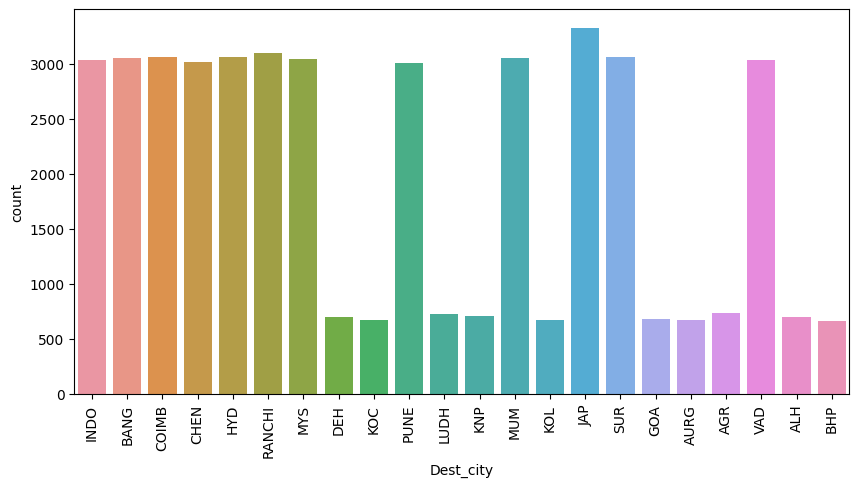

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Dest_city')
plt.xticks(rotation='vertical')
plt.show()

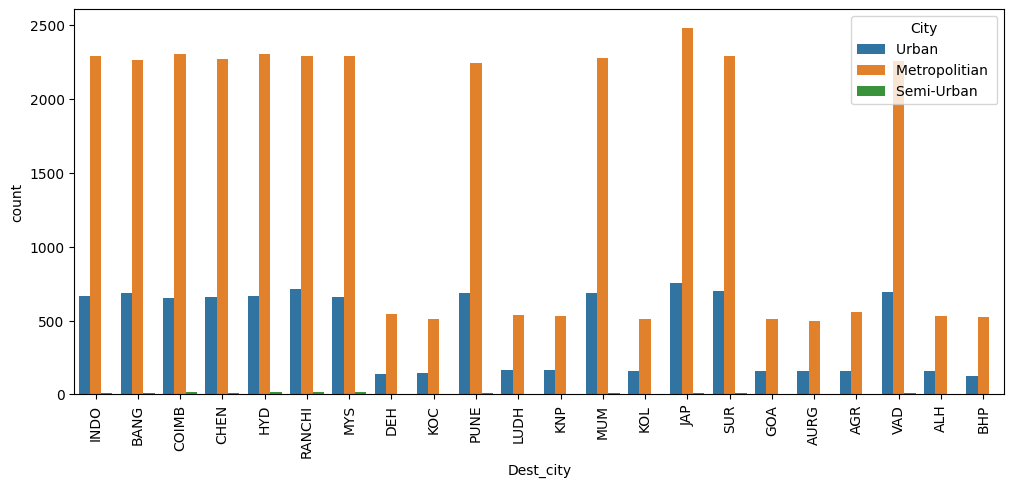

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x=df['Dest_city'],hue=df['City'])
plt.xticks(rotation='vertical')
plt.show() # as expected Metropolitian cities ordered most of the orders

<Axes: xlabel='Type_of_order', ylabel='count'>

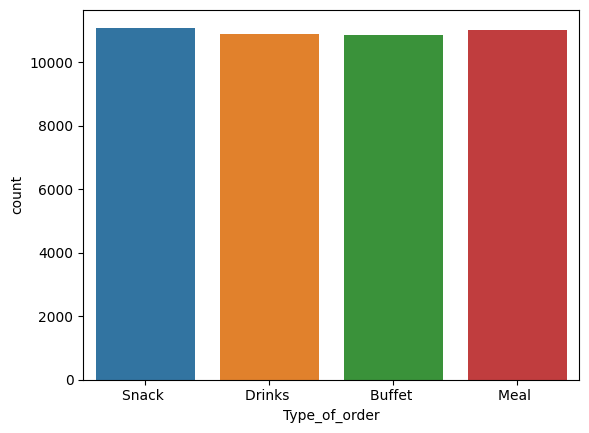

In [36]:
sns.countplot(x=df['Type_of_order']) # The type of order is evenly distributed

<Axes: xlabel='City', ylabel='count'>

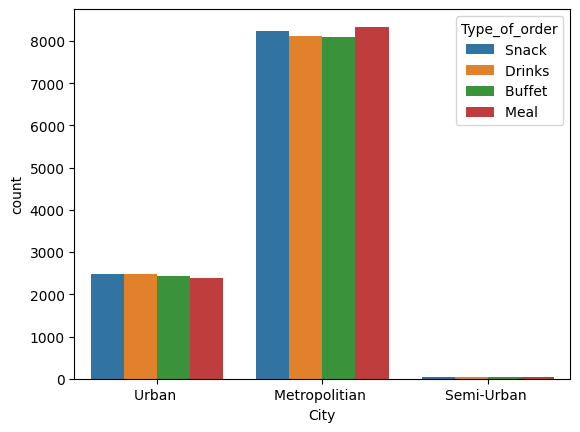

In [37]:
sns.countplot(x=df['City'],hue=df['Type_of_order'])

<Axes: xlabel='Type_of_order', ylabel='count'>

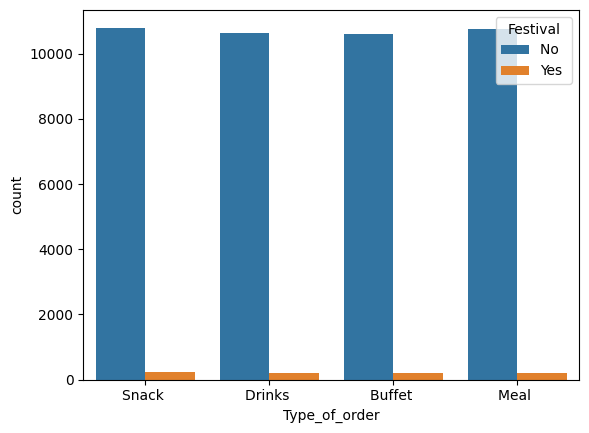

In [38]:
sns.countplot(x=df['Type_of_order'],hue=df['Festival']) #Festival doesn't affect the food ordering frequency

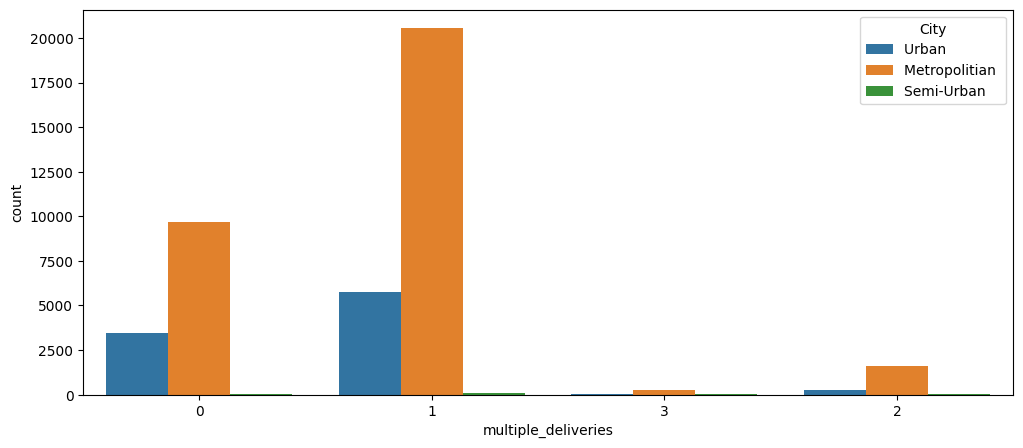

In [39]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['multiple_deliveries'],hue=df['City'])
plt.show()

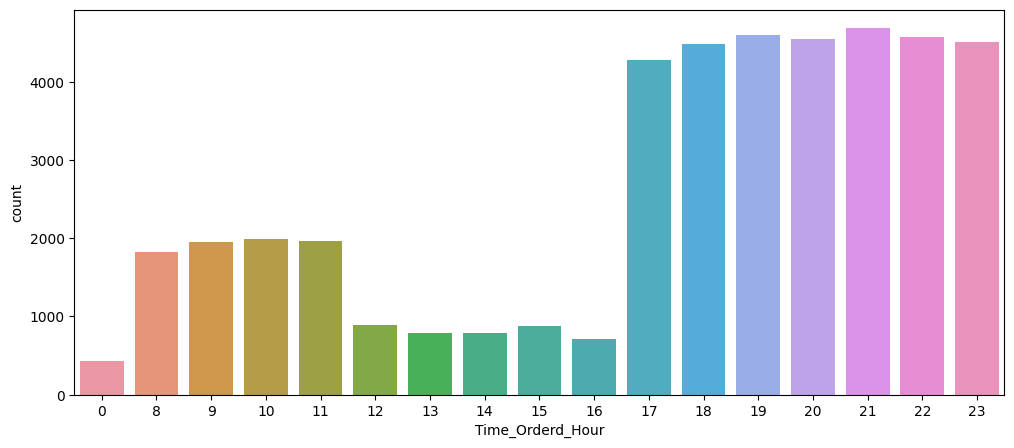

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Time_Orderd_Hour'])
plt.show()

<Axes: xlabel='Vehicle_condition', ylabel='count'>

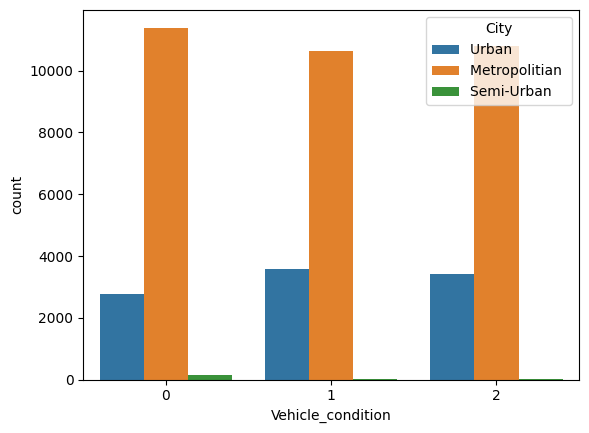

In [41]:
sns.countplot(x=df['Vehicle_condition'],hue=df['City'])
#Vehicle condition is overall good in all 3 cities
#It has taken more time to deliver food in semi-urban cities, likely due to traffic or road conditions.

<Axes: xlabel='City', ylabel='count'>

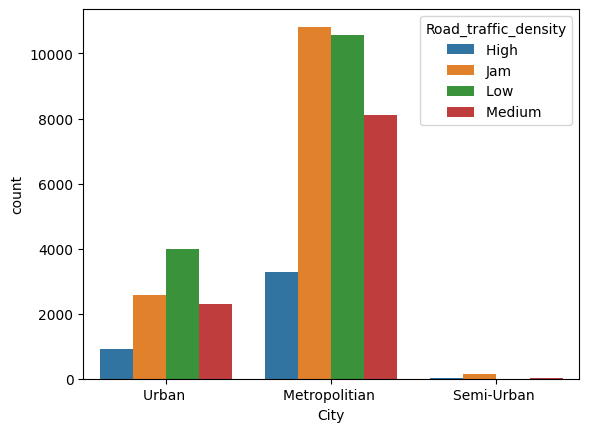

In [42]:
sns.countplot(x=df['City'],hue=df['Road_traffic_density'])

### Model Building

In [43]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [44]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,...,Time_taken(min),Dest_city,Year,Month,Day,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,conditions Sunny,High,...,(min) 24,INDO,2022,3,19,11,30,11,45,3.025149
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,conditions Stormy,Jam,...,(min) 33,BANG,2022,3,25,19,45,19,50,20.183530
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,conditions Sandstorms,Low,...,(min) 26,BANG,2022,3,19,8,30,8,45,1.552758
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,conditions Sunny,Medium,...,(min) 21,COIMB,2022,5,4,18,0,18,10,7.790401
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,conditions Cloudy,High,...,(min) 30,CHEN,2022,3,26,13,30,13,45,6.210138


In [45]:
df.drop(['Time_Orderd','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude',
        'Year','Month','Day','Time_Orderd_Min','Time_Order_picked_Hour','Time_Order_picked_Min',
         'Dest_city','Time_Orderd','Time_Orderd_Hour','Time_Order_picked'],axis=1,inplace=True)

In [46]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,37.0,4.9,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3.025149
1,34.0,4.5,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20.183530
2,23.0,4.4,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1.552758
3,38.0,4.7,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7.790401
4,32.0,4.6,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6.210138


In [48]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace(r'\W','',regex=True)
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace(r'\D','',regex=True).astype('float64')
df['Time_taken(min)'].head()

0    24.0
1    33.0
2    26.0
3    21.0
4    30.0
Name: Time_taken(min), dtype: float64

In [49]:
df.dropna(inplace=True)

In [50]:
obj = df.select_dtypes(include=['object'])
num = df.select_dtypes(include=['int64','float64'])
print(obj.columns)
print(num.columns)

Index(['Weatherconditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City'],
      dtype='object')
Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'Time_taken(min)', 'distance'],
      dtype='object')


In [51]:
obj=['Weatherconditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City']
num = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'distance']

In [52]:
X  = df.drop('Time_taken(min)',axis=1)
y = df[['Time_taken(min)']]

In [53]:
numerical_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler(with_mean=False))
])

categorical_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('scaler',StandardScaler(with_mean=False))
])

In [54]:
pipe = ColumnTransformer([
    ('numerical',numerical_pipeline,num),
    ('categorical',categorical_pipeline,obj)
])

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
x_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,distance
43452,34.0,4.8,conditions Cloudy,Medium,0,Buffet,motorcycle,1,No,Metropolitian,13.789631
20999,31.0,4.5,conditions Fog,Low,2,Buffet,electric_scooter,0,No,Metropolitian,9.435202
31569,21.0,4.8,conditions Fog,Low,0,Drinks,motorcycle,1,No,Metropolitian,17.137415
23298,21.0,4.9,conditions Fog,Medium,1,Snack,scooter,1,No,Metropolitian,11.983627
42956,35.0,4.6,conditions Windy,Jam,0,Snack,motorcycle,2,No,Metropolitian,16.635518


In [56]:
y_train.head()

,Time_taken(min)
43452,44.0
20999,18.0
31569,23.0
23298,29.0
42956,37.0


In [57]:
x_train = pipe.fit_transform(x_train)
x_test = pipe.transform(x_test)

In [58]:
def scores(y_test,p):

    r2 = r2_score(y_test, p)
    MAE = mean_absolute_error(y_test, p)
    MSE = mean_squared_error(y_test, p)
    rmse = np.sqrt(mean_squared_error(y_test, p))
    print(' r2_score:  {:.2f}'.format(r2))
    print(' MAE:   {:.2f}'.format(MAE))
    print(' MSE:   {:.2f}'.format(MSE))
    print(' rmse:  {:.2f}'.format(rmse))
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

In [59]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge' : Ridge(),
    'Random Forest' : RandomForestRegressor(),
    'Gradient Boosting' : GradientBoostingRegressor(),
    'XGBRegressor' : XGBRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'SVM' : SVR()
}

In [65]:
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(x_train,y_train)
  p = model.predict(x_test)
  print(list(models.keys())[i])
  scores(y_test,p)

Linear Regression
 r2_score:  0.61
 MAE:   4.66
 MSE:   34.56
 rmse:  5.88
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Ridge
 r2_score:  0.61
 MAE:   4.66
 MSE:   34.56
 rmse:  5.88
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Random Forest
 r2_score:  0.83
 MAE:   3.09
 MSE:   14.93
 rmse:  3.86
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Gradient Boosting
 r2_score:  0.78
 MAE:   3.54
 MSE:   19.41
 rmse:  4.41
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
XGBRegressor
 r2_score:  0.83
 MAE:   3.07
 MSE:   14.71
 rmse:  3.83
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Decision Tree
 r2_score:  0.68
 MAE:   4.05
 MSE:   27.68
 rmse:  5.26
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
SVM
 r2_score:  0.65
 MAE:   4.33
 MSE:   30.65
 rmse:  5.54
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


### Best Perforaming models with r2 score are Random Forest(0.83) and XGBRegressor(0.83).